In [8]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.io import fits

In [80]:
import sys
sys.path.append('../')
from corrfunc import compute_corr, C
from processing import generate_dust_maps, generate_ref_maps, coord2hp

In [4]:
generate_dust_maps(128)

[array([ 1.5860498e-03,  3.9439648e-05,  3.3333339e-04, ...,
        -4.1032303e-04, -2.1702303e-03, -9.1333780e-04], dtype=float32),
 array([-0.00104005,  0.00052232,  0.00185755, ..., -0.00110596,
        -0.00224349, -0.00119022], dtype=float32)]

In [5]:
ref_maps = generate_ref_maps(2048)

In [6]:
ref_maps

{'0.1<z<0.2': array([-1.6375e+30, -1.6375e+30, -1.6375e+30, ..., -1.6375e+30,
        -1.6375e+30, -1.6375e+30]),
 '0.3<z<0.4': array([-1.6375e+30, -1.6375e+30, -1.6375e+30, ..., -1.6375e+30,
        -1.6375e+30, -1.6375e+30]),
 '0.5<z<0.6': array([-1.6375e+30, -1.6375e+30, -1.6375e+30, ..., -1.6375e+30,
        -1.6375e+30, -1.6375e+30]),
 '1.2<z<1.3': array([-1.6375e+30, -1.6375e+30, -1.6375e+30, ..., -1.6375e+30,
        -1.6375e+30, -1.6375e+30])}

In [ ]:
'''
processed_maps
    reference_maps
        0.1z0.2_2048_overdensityfield.csv
        0.3z0.4_2048_overdensityfield.csv
        0.5z0.6_2048_overdensityfield.csv
        1.2z1.3_2048_overdensityfield.csv
        0.1z0.2_4096_overdensityfield.csv
        0.3z0.4_4096_overdensityfield.csv
        0.5z0.6_4096_overdensityfield.csv
        1.2z1.3_4096_overdensityfield.csv
    dust_maps
        ebv_2048_1998.csv
        ebv_4096_1998.csv



'''

In [9]:
full_path_ref = '/Users/williiamlaplante/Research/SynchrotronMaps/data/ReferenceSamples/'
refsample = fits.open(full_path_ref + 'full_ref_sample.fits')[1].data


In [22]:
refsample['Z'].size


1131500

In [29]:
dummy = ref_maps['1.2<z<1.3']

In [47]:
(dummy[dummy!=hp.UNSEEN] == someval).sum()

8143

In [48]:
dummy[dummy!=hp.UNSEEN].size

8165

In [50]:
z = refsample['Z']

In [54]:
blue_data = refsample[np.where((1.2 < z) & (z < 1.3))]

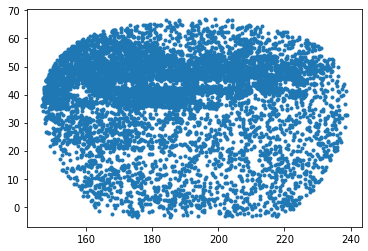

In [59]:
plt.plot(blue_data['RA'], blue_data['DEC'], '.')

In [61]:
pix = hp.ang2pix(2048,blue_data['RA'], blue_data['DEC'], lonlat=True)

In [70]:
hpmap = np.histogram(pix, bins=hp.nside2npix(2048), range=[0, hp.nside2npix(2048)])[0]

In [79]:
(hpmap != hpmap[0]).sum()

8253

In [ ]:
def plot():
    full_path_ref = '/Users/williiamlaplante/Research/SynchrotronMaps/data/ReferenceSamples/'
    refsample = fits.open(full_path_ref + 'full_ref_sample.fits')[1].data
    for nside in [128,256,512,102]
    m = coord2hp(refsample['RA'], refsample['DEC'], nside)